In [5]:
'''
SB:  This blog post says I can achieve 80% accuracty with a very fast-running model
with augmentation!  The in-Chollet-book example with aug only achieved about 70% for me, but
took 5 hours on my pc...  This one worked better!--about 80%!!

And the augmentation is even simpler than in the book!  just shear, zoom and flip!
It could be that the shift doen't work so well--what is shifted in??

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

This script goes along the blog post
"Building powerful image classification models using very little data"
from blog.keras.io.
It uses data that can be downloaded at:
https://www.kaggle.com/c/dogs-vs-cats/data
In our setup, we:
- created a data/ folder
- created train/ and validation/ subfolders inside data/
- created cats/ and dogs/ subfolders inside train/ and validation/
- put the cat pictures index 0-999 in data/train/cats
- put the cat pictures index 1000-1400 in data/validation/cats
- put the dogs pictures index 12500-13499 in data/train/dogs
- put the dog pictures index 13500-13900 in data/validation/dogs
So that we have 1000 training examples for each class, and 400 validation examples for each class.
In summary, this is our directory structure:
```
data/
    train/
        dogs/
            dog001.jpg
            dog002.jpg
            ...
        cats/
            cat001.jpg
            cat002.jpg
            ...
    validation/
        dogs/
            dog001.jpg
            dog002.jpg
            ...
        cats/
            cat001.jpg
            cat002.jpg
            ...
```
'''

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K


# dimensions of our images.
img_width, img_height = 150, 150

#train_data_dir = 'data/train'
train_data_dir = '/home/sbradley/tensorflow/mlenv/chollet_book/dogs_vs_cats/train'
#validation_data_dir = 'data/validation'
validation_data_dir = '/home/sbradley/tensorflow/mlenv/chollet_book/dogs_vs_cats/validation'
nb_train_samples = 2000
nb_validation_samples = 800  # actually have 1000, but match
epochs = 50
batch_size = 16

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

#model.save_weights('keras_blog_quick80percent_weights.h5')
model.save('keras_blog_quick80percent_model.h5')  # for next time save the model!

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/50
125/125 [==============================] - 117s 938ms/step - loss: 0.7156 - acc: 0.5195 - val_loss: 0.6861 - val_acc: 0.6190
Epoch 2/50
125/125 [==============================] - 111s 886ms/step - loss: 0.6728 - acc: 0.6050 - val_loss: 0.6379 - val_acc: 0.6240
Epoch 3/50
125/125 [==============================] - 106s 846ms/step - loss: 0.6554 - acc: 0.6280 - val_loss: 0.6058 - val_acc: 0.6590
Epoch 4/50
125/125 [==============================] - 106s 844ms/step - loss: 0.6121 - acc: 0.6645 - val_loss: 0.5917 - val_acc: 0.6890
Epoch 5/50
125/125 [==============================] - 105s 836ms/step - loss: 0.6081 - acc: 0.6945 - val_loss: 0.6044 - val_acc: 0.6630
Epoch 6/50
125/125 [==============================] - 106s 852ms/step - loss: 0.5905 - acc: 0.7000 - val_loss: 0.6352 - val_acc: 0.6110
Epoch 7/50
125/125 [==============================] - 114s 916ms/step - loss: 0.5739 - acc: 0.7105 -

started at 9:15 PM  estimated time: 5000 sec/3600 = 1.5 hours. 10:45 PM
        
According to chollet:
    We can now use these generators to train our model. Each epoch takes 20-30s on GPU and 300-400s on CPU. 
    So it's definitely viable to run this model on CPU if you aren't in a hurry.

    So my per-epoch time is half of Chollet's in 2016!   I am running on Ubuntu VM on the SDD drive of my Dell CPU.

    my pc:  Dell with Intel Core i7-4790 CPU @3.6 GHz
            memory: 24 GB

       My Ubuntu:
     Description:	Ubuntu 18.04.1 LTS
    Codename:	bionic
                

It looks like this simple augmentated fit resulted in about 78% validation accuracy even by the 20th epoch or so!!
And, it had not too bad overfitting--achieving76 to 80 validation and 85% training accuracy.

Unfortunately one must get the history via the callback using the following at run time for the fit!
And, you have to store this history separately from the model to access it again:
    
    
history = model.fit_generator(...)
if you miss this chance to set the history during fit, it is too late!  Need to re-run the whole fit.

125/125 [==============================] - 105s 836ms/step - loss: 0.4434 - acc: 0.7960 - val_loss: 0.5462 - val_acc: 0.7640
Epoch 21/50
125/125 [==============================] - 104s 835ms/step - loss: 0.4387 - acc: 0.8180 - val_loss: 0.5634 - val_acc: 0.7860
Epoch 22/50
125/125 [==============================] - 105s 842ms/step - loss: 0.4116 - acc: 0.8130 - val_loss: 0.4988 - val_acc: 0.7740
            

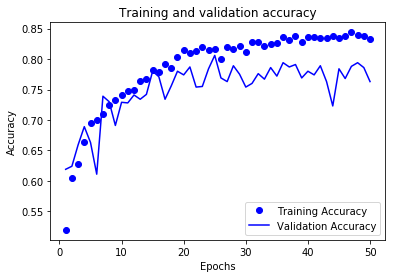

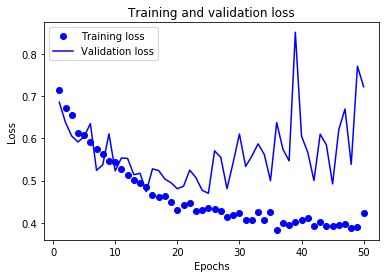

In [8]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
training_loss = history.history['loss']
#print("training_loss: ", training_loss) 
validation_loss = history.history['val_loss']
#print("validation_loss: ", validation_loss) 

epochs = range(1,len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, training_loss, 'bo', label='Training loss')
plt.plot(epochs, validation_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()